# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [46]:
from src.make_db import create_movies_db

In [47]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [48]:
import sqlite3
import pandas as pd

conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

In [49]:
table_name_query = '''SELECT *
                        FROM tmdb_movies 
                        JOIN bom_movie_gross
                        ON tmdb_movies.title = bom_movie_gross.title'''
pd.read_sql(table_name_query, conn)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,idx,title,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,6,Iron Man 2,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,3,Inception,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,0,Toy Story 3,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,8,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,26251,[],501956,en,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,1942,Spotlight,ORF,45100000.0,53200000,2015
2699,26339,"[99, 99]",474464,en,The Judge,0.600,2018-04-13,The Judge,7.5,2,1557,The Judge,WB,47100000.0,37300000,2014
2700,26396,"[18, 10751]",574534,fr,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,2228,Flowers,MBox,61600.0,None,2015
2701,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,3319,Last Letter,CL,181000.0,None,2018


In [77]:
df = pd.read_sql(table_name_query, conn)
df

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,idx,title,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,6,Iron Man 2,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,3,Inception,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,0,Toy Story 3,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,8,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,26251,[],501956,en,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,1942,Spotlight,ORF,45100000.0,53200000,2015
2699,26339,"[99, 99]",474464,en,The Judge,0.600,2018-04-13,The Judge,7.5,2,1557,The Judge,WB,47100000.0,37300000,2014
2700,26396,"[18, 10751]",574534,fr,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,2228,Flowers,MBox,61600.0,None,2015
2701,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,3319,Last Letter,CL,181000.0,None,2018


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  idx                2703 non-null   int64  
 11  title              2703 non-null   object 
 12  studio             2702 non-null   object 
 13  domestic_gross     2682 non-null   float64
 14  foreign_gross      1723 non-null   object 
 15  year               2703 non-null   int64  
dtypes: float64(3), int64(5),

In [52]:
df.describe()

,idx,id,popularity,vote_average,vote_count,idx,domestic_gross,year
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2.682000e+03,2703.000000
mean,11686.778024,213291.491306,10.002752,6.418572,1358.194599,1711.532741,3.629150e+07,2014.044395
std,7459.175381,139706.978070,7.294182,0.916424,2408.885097,960.515610,7.734897e+07,2.440458
min,1.000000,1771.000000,0.600000,0.000000,1.000000,0.000000,1.000000e+02,2010.000000
25%,5289.000000,76493.500000,5.881000,5.900000,78.000000,885.500000,2.000000e+05,2012.000000
50%,11319.000000,209249.000000,8.627000,6.500000,393.000000,1753.000000,3.800000e+06,2014.000000
75%,17675.000000,334521.500000,12.698500,7.000000,1440.000000,2524.500000,3.882500e+07,2016.000000
max,26506.000000,574534.000000,80.773000,10.000000,22186.000000,3386.000000,9.367000e+08,2018.000000


In [53]:
df.fillna(0, inplace=True)
df

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,idx,title,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,6,Iron Man 2,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,3,Inception,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,0,Toy Story 3,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,8,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,26251,[],501956,en,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,1942,Spotlight,ORF,45100000.0,53200000,2015
2699,26339,"[99, 99]",474464,en,The Judge,0.600,2018-04-13,The Judge,7.5,2,1557,The Judge,WB,47100000.0,37300000,2014
2700,26396,"[18, 10751]",574534,fr,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,2228,Flowers,MBox,61600.0,0,2015
2701,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,3319,Last Letter,CL,181000.0,0,2018


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  idx                2703 non-null   int64  
 11  title              2703 non-null   object 
 12  studio             2703 non-null   object 
 13  domestic_gross     2703 non-null   float64
 14  foreign_gross      2703 non-null   object 
 15  year               2703 non-null   int64  
dtypes: float64(3), int64(5),

Comparing the data bewteen popularity and vote count and also popularity and domestic_gross.

In [55]:
df = df.drop(['idx', 'id', 'genre_ids', 'original_language',], axis = 1)
df

,original_title,popularity,release_date,title,vote_average,vote_count,title,studio,domestic_gross,foreign_gross,year
0,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,Par.,312400000.0,311500000,2010
2,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,WB,292600000.0,535700000,2010
3,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,BV,415000000.0,652000000,2010
4,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
2698,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,Spotlight,ORF,45100000.0,53200000,2015
2699,The Judge,0.600,2018-04-13,The Judge,7.5,2,The Judge,WB,47100000.0,37300000,2014
2700,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,Flowers,MBox,61600.0,0,2015
2701,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,Last Letter,CL,181000.0,0,2018


In [56]:
df.drop_duplicates(inplace=True)

<ipython-input-56-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [57]:
df

,original_title,popularity,release_date,title,vote_average,vote_count,title,studio,domestic_gross,foreign_gross,year
0,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,Par.,312400000.0,311500000,2010
2,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,WB,292600000.0,535700000,2010
3,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,BV,415000000.0,652000000,2010
4,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
2698,Spotlight,0.600,2018-01-28,Spotlight,10.0,1,Spotlight,ORF,45100000.0,53200000,2015
2699,The Judge,0.600,2018-04-13,The Judge,7.5,2,The Judge,WB,47100000.0,37300000,2014
2700,Des fleurs,0.600,2018-08-08,Flowers,6.0,1,Flowers,MBox,61600.0,0,2015
2701,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,Last Letter,CL,181000.0,0,2018


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df['vote_average']

0        7.7
1        6.8
2        8.3
3        7.7
4        7.2
        ... 
2698    10.0
2699     7.5
2700     6.0
2701     6.0
2702     0.0
Name: vote_average, Length: 2703, dtype: float64

Text(0, 0.5, 'vote_average')

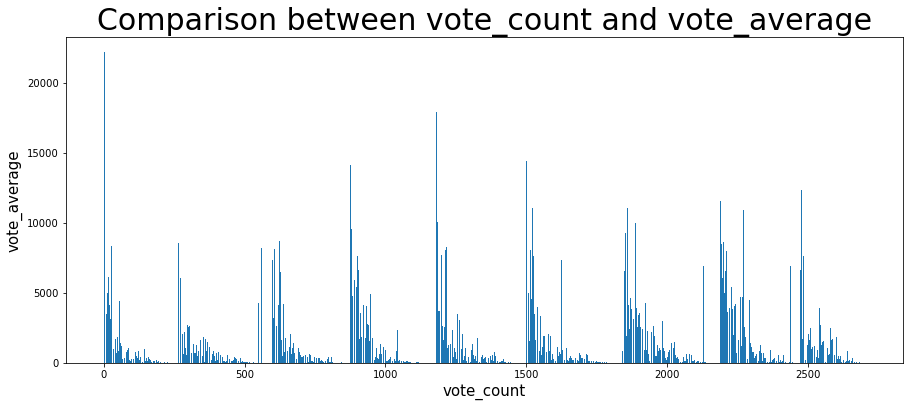

In [81]:

#voting_counts = df.value_counts()

x = df['vote_average'].index
y = df['vote_count'].values

plot_one_fig, plot_one_ax = plt.subplots(figsize=(15,6))
plot_one_ax.bar(x, y)

#plot_one_ax.tick_params(axis='x', labelsize=20)
plot_one_ax.set_title('Comparison between vote_count and vote_average', fontsize=30)
plot_one_ax.set_xlabel('vote_count', fontsize=15)
plot_one_ax.set_ylabel('vote_average', fontsize=15)

In [64]:
df2 = pd.read_csv('data/project_data.csv')
df2

,Year,Tickets Sold,Total Box Office,Total Inflation,Average
0,NaN,NaN,NaN,Adjusted Box Office,Ticket Price
1,2021.0,"182,519,895","$1,671,882,236","$1,671,882,236",$9.16
2,2020.0,"223,880,995","$2,050,751,679","$2,050,751,679",$9.16
3,2019.0,"1,228,763,381","$11,255,475,182","$11,255,475,286",$9.16
4,2018.0,"1,311,323,188","$11,946,156,764","$12,011,720,422",$9.11
5,2017.0,"1,225,639,761","$10,993,991,460","$11,226,860,216",$8.97
6,2016.0,"1,301,658,904","$11,259,352,764","$11,923,195,562",$8.65
7,2015.0,"1,323,267,005","$11,155,143,861","$12,121,125,772",$8.43
8,2014.0,"1,257,400,618","$10,272,966,196","$11,517,789,658",$8.17
9,2013.0,"1,339,168,926","$10,887,446,341","$12,266,787,382",$8.13


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              27 non-null     float64
 1   Tickets Sold      27 non-null     object 
 2   Total Box Office  27 non-null     object 
 3   Total Inflation   28 non-null     object 
 4   Average           27 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.2+ KB


In [72]:
df2 = df2.sort_values(['Tickets Sold'], ascending=False)
df2

,Year,Tickets Sold,Total Box Office,Total Inflation,Average
2,2020.0,"223,880,995","$2,050,751,679","$2,050,751,679",$9.16
1,2021.0,"182,519,895","$1,671,882,236","$1,671,882,236",$9.16
20,2002.0,"1,575,756,527","$9,155,147,215","$14,433,929,789",$5.81
19,2003.0,"1,524,585,021","$9,193,249,557","$13,965,198,787",$6.03
18,2004.0,"1,495,651,298","$9,287,996,519","$13,700,165,883",$6.21
21,2001.0,"1,465,874,205","$8,296,849,636","$13,427,407,722",$5.66
23,1999.0,"1,444,664,086","$7,338,894,852","$13,233,123,027",$5.08
24,1998.0,"1,443,827,003","$6,771,549,637","$13,225,455,352",$4.69
15,2007.0,"1,420,036,680","$9,769,854,914","$13,007,535,993",$6.88
13,2009.0,"1,418,567,388","$10,639,257,284","$12,994,051,137",$7.50
